## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
job_tracker = pd.read_csv("Job_Application_Tracker.csv")
job_tracker.head()

,Application ID,Job Title,Company Name,Location,Job Source,Job Posting Date,Application Date,Days Since Applied,Application Status,Resume Version,Cover Letter (Yes/No),Recruiter / HM Name,Recruiter LinkedIn,Follow-Up Date,Follow-Up Done (Yes/No),Response Received (Yes/No),Interview Stage,Interview Date,Outcome,Notes
0,JR0303408,Data Scientist Senior,FIS,Pune,LinkedIn,NaN,12 Jan 2026,28d,Applied,Data Science,No,NaN,NaN,NaN,No,No,NaN,NaN,NaN,NaN
1,59198,Data Scientist-Artificial Intelligence,IBM,Pune,LinkedIn,NaN,31 Dec 2025,40d,Rejected,Data Science,No,NaN,NaN,NaN,No,Yes,NaN,NaN,NaN,NaN
2,R-167831,Senior Data Analyst,Avatar,Pune,LinkedIn,NaN,20 Jan 2026,20d,Applied,Data Science,No,NaN,NaN,NaN,No,No,NaN,NaN,NaN,NaN
3,2024-26216,Sr Analyst BI,Gallagher,Pune,LinkedIn,NaN,20 Jan 2026,20d,Applied,Data Science,No,NaN,NaN,NaN,No,No,NaN,NaN,NaN,NaN
4,25924994,Business Analytics Analyst - AVP,Citi Bank,Pune,LinkedIn,NaN,20 Jan 2026,20d,Applied,Data Science,No,NaN,NaN,NaN,No,No,NaN,NaN,NaN,NaN


In [3]:
company_counts = job_tracker.groupby("Application Status")["Company Name"].nunique()

In [4]:
location_summary = job_tracker.groupby(["Location", "Application Status"]).size().unstack(fill_value = 0)

In [5]:
# Calculaing rejection rate
location_summary["Total"] = location_summary.sum(axis=1)

location_summary["Rejection_Rate"] = (
    location_summary.get("Rejected", 0)
    / location_summary["Total"]
) * 100

### Dashboard

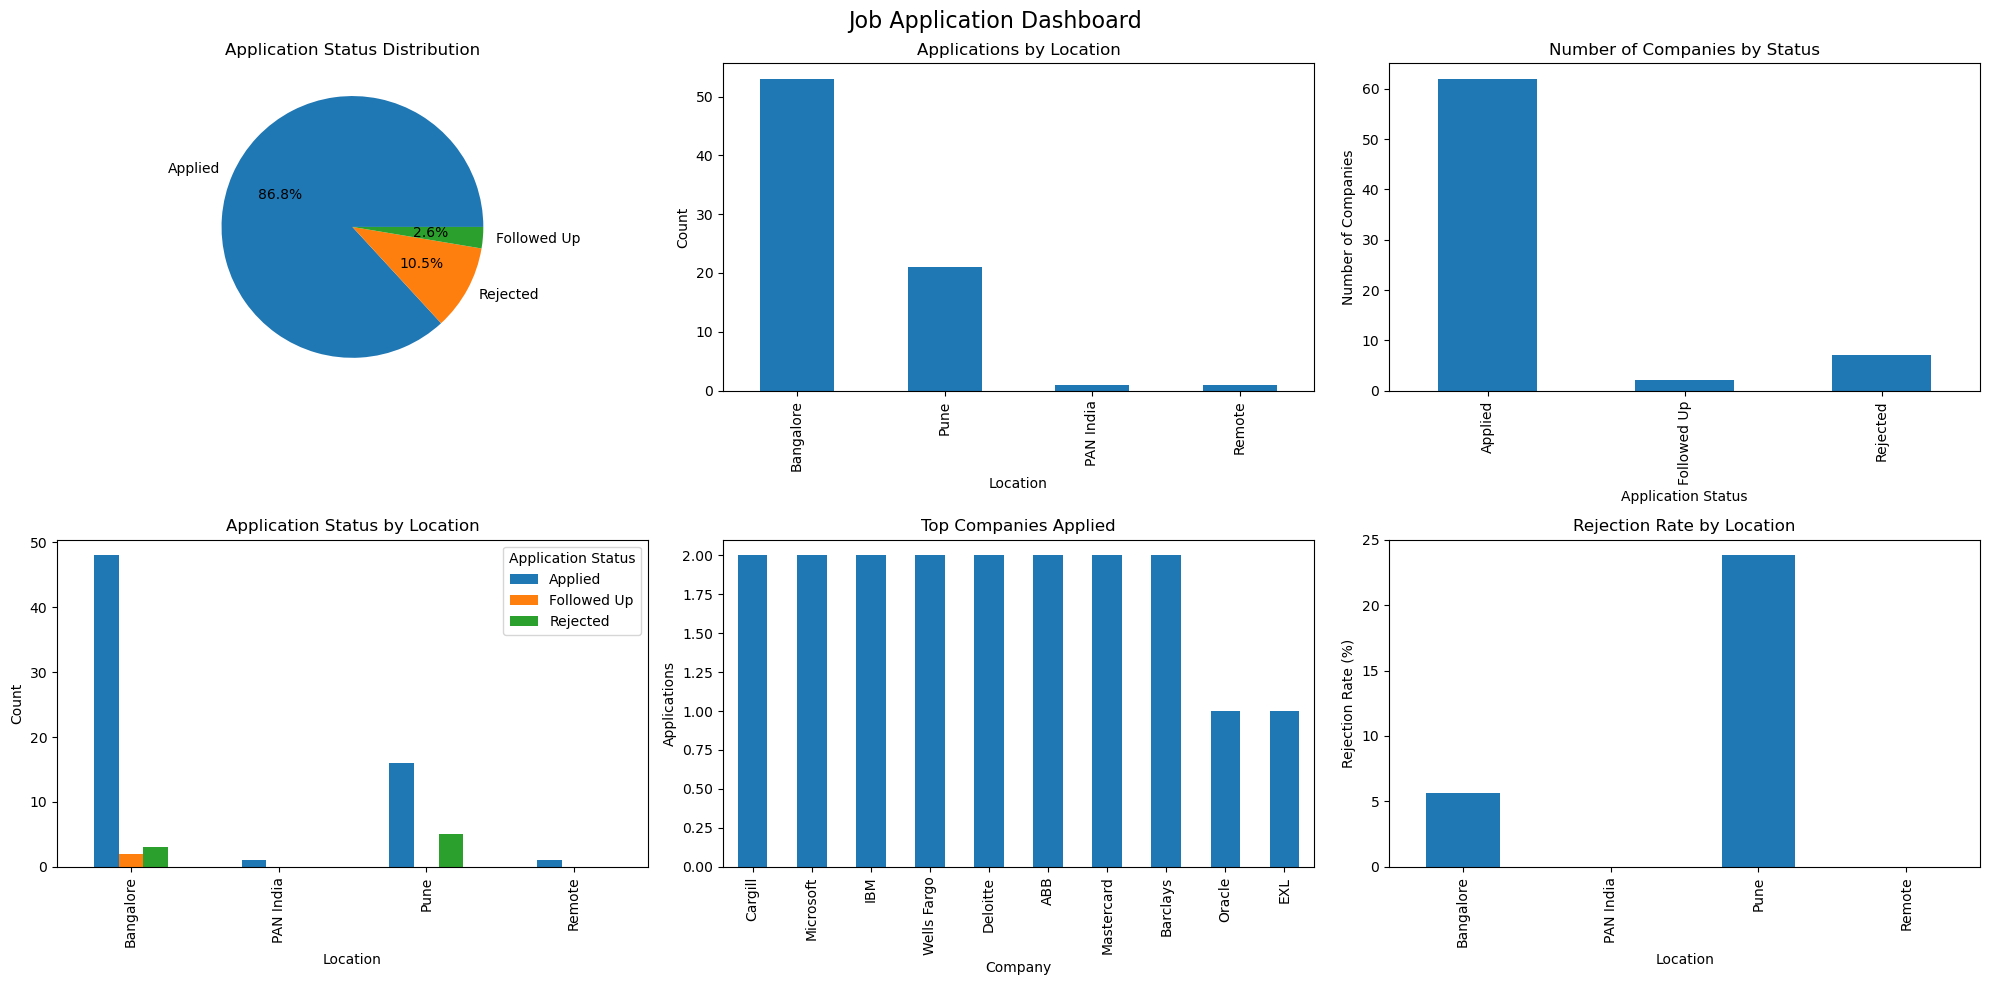

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle("Job Application Dashboard", fontsize=16)


# Graph 1 - Application Status Distribution
job_tracker["Application Status"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    ax=axes[0,0]
)

axes[0,0].set_title("Application Status Distribution")
axes[0,0].set_ylabel("")


# Graph 2 - Applications by Location
job_tracker["Location"].value_counts().plot(
    kind="bar",
    ax=axes[0,1]
)

axes[0,1].set_title("Applications by Location")
axes[0,1].set_xlabel("Location")
axes[0,1].set_ylabel("Count")


# Graph 3 - Status by Location
status_location = (
    job_tracker.groupby(["Location", "Application Status"])
      .size()
      .unstack(fill_value=0)
)

status_location.plot(kind="bar", ax=axes[1,0])

axes[1,0].set_title("Application Status by Location")
axes[1,0].set_xlabel("Location")
axes[1,0].set_ylabel("Count")


# Graph 4 - Top Companies Applied To
job_tracker["Company Name"].value_counts().head(10).plot(
    kind="bar",
    ax=axes[1,1]
)

axes[1,1].set_title("Top Companies Applied")
axes[1,1].set_xlabel("Company")
axes[1,1].set_ylabel("Applications")


# Graph 5 - Number of companies by Status
company_counts.plot(
    kind="bar",
    ax=axes[0,2]
)

axes[0,2].set_title("Number of Companies by Status")
axes[0,2].set_xlabel("Application Status")
axes[0,2].set_ylabel("Number of Companies")


# Grah 6 - Plot Rejection Rate by Location
location_summary["Rejection_Rate"].plot(
    kind="bar",
    ax=axes[1,2]
)

axes[1,2].set_title("Rejection Rate by Location")
axes[1,2].set_xlabel("Location")
axes[1,2].set_ylabel("Rejection Rate (%)")


plt.tight_layout()
plt.show()